# In-Class 8+9: Special Relativity

Today we're going to get our first look at the the physical consequences of Special Relativity. In class, you learned about length contraction and time dilation. We're going to explore the distortions these effects create in perception of the world around us, and the physical, measurable impact they have on the earth's surface.

Special Relativity tells us that two observers moving very quickly with respect to one another will experience time and space differently. We often use the word _boost_ to refer to velocity difference between two frames. Observers that are boosted with respect to some other object will experience _length contraction_. The apparent length of an object depends on the size of the boost, defined as

$$ L = \frac{L_0}{\gamma} $$.

Here, $L$ is the observed distance between two points on an object, while $L_0$ is the distance between those points in the rest frame of the object. $\gamma$ is the Lorentz factor, defined as

$$ \gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}} $$.

From this equation, it should be clear that $\gamma$ is approximately 1 when speeds are much smaller than the speed of light, and gets larger and larger (approaching infinity) as speeds get closer to the speed of light. As far as we know, it's not possible for an observer to exceed the speed of light (with some interesting exceptions in the inflationary period of expansion we think occurred after the big bang - but that's a topic for another time!)

Importantly, _length is only contracted in the direction of boost_. If you are flying above the surface of the Earth at relativistic speeds, the earth will appear to contract in the direction you're flying in, but if you look left or right, distances along that axis will be preserved. 

Clocks also behave differently with different boost. Observers that are boosted with respect to one another will also experience _time dilation_. Two events will seem further apart to an observer if they're occuring in a frame boosted with respect to them. To that observer, time will appear as

$$ \Delta t = \gamma\Delta t_0 $$.

Here $\Delta t_0$ represents the time interval between two instances in the rest frame of those events, while $\Delta t$ gives the apparent time interval to the observer moving at velocity $v$. This means, for example, that if you were to fly away from the earth at relativistics speeds, to someone on earth, you would appear to be aging more slowly than them. (The interpretation of this can be tricky and leads to something called the twin paradox -- check it out if you're curious!)

_To summarize, as you move past an object, its length (in the direction of your boost) will appear to shrink, and its clock will appear to move more slowly._

Today we'll work with simulating the impact of these two effects. 

## Calculating $\gamma$

To start out, let's write a function that gives us our $\gamma$ value when given a speed. **Below, write a function called `getGamma()` that takes a velocity as an argument, and returns the  the value of $\gamma$**. 

Import any modules you need, and define any constants you need. (PS, the speed of light is 299792458 m/s.)

In [1]:
# TODO
import numpy as np

c = 299792458

def getGamma(v):
    return 1/(np.sqrt(1-(v*v)/(c*c)))

We define the variable $\beta = v/c$. **Make a plot of $\gamma$ as a function of $\beta$ using the function you defined.**

Some tips:
* Import any modules you need
* Don't forget to label your axes. You can use Greek letters in your labels but you need to use "raw" strings, or python will get confused about how to interpret your backslashes. It looks something like this: `plt.xlabel(r"$\beta$")`
* Think carefully about what range you want for your x axis

<function matplotlib.pyplot.show(close=None, block=None)>

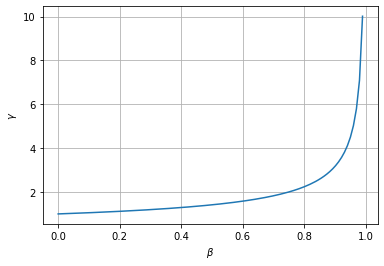

In [2]:
# TODO

import matplotlib.pyplot as plt

x_steps = 200
velocities = np.linspace(0, (c - (c / x_steps) ), x_steps)

def getBeta(v):
    return (v * v) / (c * c)

x_vals = getBeta(velocities)
y_vals = getGamma(velocities)

plt.plot(x_vals, y_vals)
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\gamma$")

plt.grid()
plt.show

Now that you've got that working, let's code up our time dilation and length contraction. **Write two functions below: `contractLength()` and `dilateTime()` that each take velocity as an input, as well as either $L_0$ or $\Delta t_0$, depending on the function, and return the apparent $L$ or $\Delta t$ to the observer.** You can use the function you just defined inside of these functions.

In [3]:
# TODO
def contractLength(L, v):
    return ( L / getGamma(v) )

def dilateTime(tau, v):
    return ( getGamma(v) * tau )

I'll handle this next part: below I wrote a function that draws a polygon for us, and I defined a shape and drew it. Imagine that this shape is lying flat on the ground, and you go flying over it at relativistic speeds. What happens to the shape you observe? We'll simulate this in the next few cells.

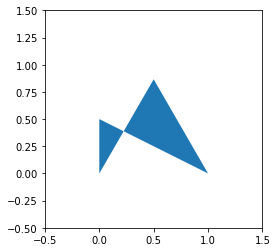

In [4]:
# We'll use the Polygon library to draw our shape
from matplotlib.patches import Polygon

# This function will actually put the shape on a figure
# It can also draw it as a dotted line 
# -- we'll use that later so we can compare our initial shape to the transformed one
def drawPolygon(fig, ax, points, dotted=False): 
    p = Polygon(points)
    if dotted: 
        p.set(fill=None, linestyle='--')
    ax.add_patch(p)
    plt.axis('scaled')
    plt.ylim(-0.5,1.5)
    plt.xlim(-0.5,1.5)

# Here's where we'll define our shape. It's just a random shape made by connecting 
# these 4 points and filling it in.
rest_point1 = [0,0]
rest_point2 = [0.5, np.sqrt(3)/2]
rest_point3 = [1,0]
rest_point4 = [0, 0.5]
rest_points = np.array([rest_point1, rest_point2, rest_point3, rest_point4])

# Here we make our figure, then draw the polygon on it.
fig, ax = plt.subplots()
drawPolygon(fig, ax, rest_points)


Now we need to show what happens if we use our `contractLength()` function to modify the shape? Below is code that takes the function you defined, and uses it to draw the change in the shape as you change your velocity. This shows what happens if you boost in the x direction.

In [5]:
# I didn't feel like redefining c to speed_of_light and chasing down the parts where I'd already called it c

speed_of_light = c

In [6]:
# How do you view the shape if you are moving past it in the x direction at velocity v?
# We'll do this with a slider so we can play with the boost
from ipywidgets import interact, FloatSlider
from copy import copy

# This function draws the original shape (with a dotted line)
# Then it draws the shape you'd see if you were passing by it with some velocity v 
# in the x direction.
def boostX(beta):
    # Draw the original shape
    fig, ax = plt.subplots()
    drawPolygon(fig, ax, rest_points, dotted=True)
    
    # Create a copy of the shape points
    boosted_points = rest_points.copy()
    
    # For every set of points (:), choose the first coordinate (0) and replace it
    # with the length contracted version, then draw
    boosted_points[:,0] = contractLength(boosted_points[:,0], beta*speed_of_light)
    drawPolygon(fig, ax, boosted_points)
    
    # Draw vector for velocity that scales in size with beta
    plt.arrow(-0.1,-0.1,beta,0, head_width = 0.05, 
              edgecolor="orange", facecolor="orange", label=r"$\beta$")
    plt.legend()

# Call the function via "interact", which lets you control it with a slider
interact(boostX, beta=FloatSlider(min=0, max=0.9999, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='beta', max=0.9999), Output()), _dom_classes=('widget…

<function __main__.boostX(beta)>

Play with the slider and observe the effects. 

**Is your function working? How can you tell? Describe what you see and whether it agrees with your expectations from what you know about length contraction.**

**Try playing with the maximum value of $\beta$, making it even closer to 1. What happens?**

**What happens if you make $\beta$ 1? Why?**

Now it's your turn. **Below, create a function `boostY()` that does the same thing as boostX(), but for a boost in the y direction. Modify the drawing of the arrow as well so it points in the y direction and scales with $\beta$. Finally, call the function with `interact()` as in the previous example to get your plot controlled by a slider.**

In [7]:
# TODO: How do you view the shape if you're moving past it in the y direction at velocity v?

# This function draws the original shape (with a dotted line)
# Then it draws the shape you'd see if you were passing by it with some velocity v 
# in the x direction.
def boostY(beta):
    # Draw the original shape
    fig, ax = plt.subplots()
    drawPolygon(fig, ax, rest_points, dotted=True)
    
    # Create a copy of the shape points
    boosted_points = rest_points.copy()
    
    # For every set of points (:), choose the first coordinate (0) and replace it
    # with the length contracted version, then draw
    boosted_points[:,1] = contractLength(boosted_points[:,1], beta*speed_of_light)
    drawPolygon(fig, ax, boosted_points)
    
    # Draw vector for velocity that scales in size with beta
    plt.arrow(-0.1,-0.1,0,beta, head_width = 0.05, 
              edgecolor="orange", facecolor="orange", label=r"$\beta$")
    plt.legend()

# Call the function via "interact", which lets you control it with a slider
interact(boostY, beta=FloatSlider(min=0, max=0.9999, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='beta', max=0.9999), Output()), _dom_classes=('widget…

<function __main__.boostY(beta)>

Now it's time to combine the two effects. What happens if the boost is at some angle $\theta$ in the x-y plane? **Below, define the function `boostAngle()` which takes both $\beta$ and an angle $\theta$ as arguments, and draws the length-contracted shape. Also draw the boost arrow that shows the angle, and scales with the size of $\beta$. Call the function with `interact()`, letting both $\beta$ and $\theta$ be contolled by sliders.** 

In [8]:
# TODO: How do you view the shape if you're moving past it at some angle in the x y plane?
def transformCoords(x, y, theta):
    x_2 = x * np.cos(theta) - y * np.sin(theta)
    y_2 = x * np.sin(theta) + y * np.cos(theta)
    return [x_2, y_2]

def boostAngle(beta, theta):
    # Draw the original shape
    fig, ax = plt.subplots()
    drawPolygon(fig, ax, rest_points, dotted=True)
    
    # Create a copy of the shape points
    transformed_points = rest_points.copy()
    
    transformed_points[:,0], transformed_points[:,1] = transformCoords(transformed_points[:,0], transformed_points[:,1], theta)
    
    boosted_points = transformed_points
    boosted_points[:,0] = contractLength(boosted_points[:,0], beta*speed_of_light)
    
    untransformed_points = boosted_points
    untransformed_points[:,0], untransformed_points[:,1] = transformCoords(untransformed_points[:,0], untransformed_points[:,1], -theta)
    
    drawPolygon(fig, ax, untransformed_points)
    
    # Draw vector for velocity that scales in size with beta
    plt.arrow(-0.1,-0.1,beta * np.cos(theta),beta * np.sin(theta), head_width = 0.05, 
              edgecolor="orange", facecolor="orange", label=r"$\beta$")
    plt.legend()
    
# Call the function via "interact", which lets you control it with a slider
interact(boostAngle, beta=FloatSlider(min=0, max=1, step=0.1, value=0.5), theta=FloatSlider(min=0, max=np.pi / 2, step=np.pi / 16, value=np.pi / 4))

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0), FloatSlider(value=0.785398163397448…

<function __main__.boostAngle(beta, theta)>

**Does the final shape depend on the angle of the boost? Why or why not?**

Yes. As the boosting angle changes, length contraction is applied along a different line across the object. 

**What happens now if you make $\beta$ 1? Does it depend on angle? What do you think is going on here? Do you think you accounted for all the effects when you did your calculation? (It's ok if you didn't, so long as you can explain what's missing. Extra credit if you can get it implemented correctly.)**

If I make $\beta=1$, the code "breaks," regardless of angle. However, this is a *feature*, not a bug. This effect mathematically results from $\gamma$ going to $\frac{1}{\sqrt{1-1}} $, or $\frac{1}{0}$, implying a physical speed limit in which $v$ cannot equal $c$. Because this feature is present in my code and the shape distorts reasonably with changing values for $\theta$, I am confident that I accounted for all relevant relativistic effects in my calculations.

### _For a challenge..._

Today's challenges use our time dilation function. Coding-wise, they're simpler than the rest of the in-class, but they require some thought about how time dilation actually works. Give them a try if you'd like, or ignore this completely! Bonus points will be given for these tasks.

The task involves understanding what happens when cosmic rays hit our atmosphere. These high energy particles interact with the molecules in our atmosphere and produce particles called muons, the more massive cousin of the electron. These muons aren't stable: they decay to electrons and neutrinos with a decay constant $\tau = 2.2 \mu\mathrm{s}$. For the purposes of this in-class, we'll assume that the muons are produced in collisions that occur 10 km above the earth's surface, and the muons travel straight down to the earth from there. 

The probability that a particle hasn't decayed as a function of time given a lifetime $\tau$ is

$$ P_\mathrm{not~decayed} = e^{-t/\tau} $$

where the time is in the rest frame of the particle itself, not the earth.

Your tasks are to:
1. Make a plot of the probability that the particle hasn't decayed as a function of time from the frame of the particle.
2. Make a plot of the probability that the particle hasn't decayed as a function of time from the frame of the earth. Begin by assuming $\beta = 0.999$. 
3. Make a plot of the probability that the particle hasn't decayed as a function of distance traveled in the earth's frame, assuming no effects from special relativity. What is the probability a given muon will make it to the earth?
4. Make a plot of the probability that the particle hasn't decayed as a function of distance traveled in the earth's frame, including effects from special relativity. What is the probability a given muon will make it to the earth?

<function matplotlib.pyplot.show(close=None, block=None)>

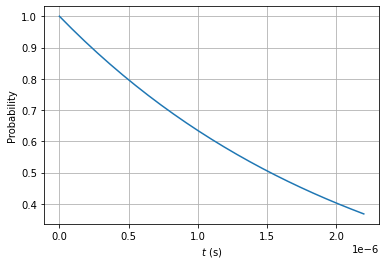

In [9]:
# Challenge Task 1

tau = 2.2 * 10**-6 #decay constant in seconds

t_1 = np.linspace(0,tau, 25)

def get_prob_mu_life(t):
    return np.exp(-t / tau)

plt.plot(t_1, get_prob_mu_life(t_1))
plt.xlabel(r"$t$ (s)")
plt.ylabel("Probability")

plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

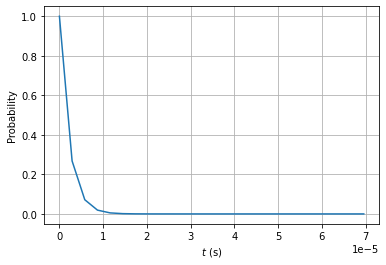

In [10]:
# Challenge Task 2

def dilateTime2(tau, beta):
    return ( 1 / np.sqrt(1-beta) ) * tau

beta = 0.999
t_2 = np.linspace(0,dilateTime2(tau,beta), 25)

plt.plot(t_2, get_prob_mu_life(t_2))
plt.xlabel(r"$t$ (s)")
plt.ylabel("Probability")

plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

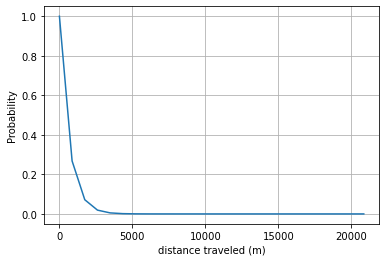

In [11]:
# Challenge Task 3

def distanceFromBeta(beta, t):
    v = np.sqrt(beta * c * c)
    return v * t

plt.plot(distanceFromBeta(beta,t_2), get_prob_mu_life(t_2))
plt.xlabel("distance traveled (m)")
plt.ylabel("Probability")

plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

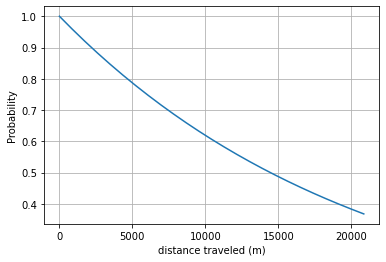

In [12]:
# Challenge Task 3

plt.plot(distanceFromBeta(beta,t_2), get_prob_mu_life(t_1))
plt.xlabel("distance traveled (m)")
plt.ylabel("Probability")

plt.grid()
plt.show